In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/d6/69/d461fa09235326e08b7ca463d5491426fdd4908ef6d3f9ed51d0777dc071/tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-macos==2.13.0 from https://files.pythonhosted.org/packages/f1/cc/6c262ae6f3a23b118b1104fa5f6126067744ffa9226faade202b0a20bdd3/tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow_macos-2.13.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.2 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatb

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Getting scraped and downloaded data + combining all csv files

In [6]:
df = pd.read_csv("microsoft stock prices/MSFT.csv")
df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Date'] >= '2018-03-24']

df['Date'] = df['Date'].dt.date

df

,Date,Open,High,Low,Close,Adj Close,Volume
8075,2018-03-26,90.610001,94.000000,90.400002,93.779999,89.375473,56396800
8076,2018-03-27,94.940002,95.139999,88.510002,89.470001,85.267906,56569000
8077,2018-03-28,89.820000,91.230003,88.870003,89.389999,85.191658,52501100
8078,2018-03-29,90.180000,92.290001,88.400002,91.269997,86.983345,45867500
8079,2018-04-02,90.470001,90.879997,87.510002,88.519997,84.362511,48515400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


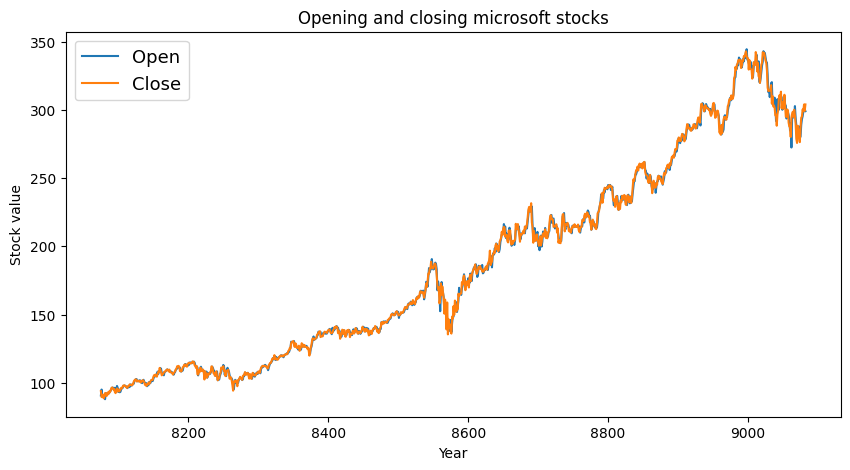

In [7]:
plt.figure(figsize = (10, 5))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.title("Plot for microsoft's opening and closing stocks")
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['Open','Close'], loc = 'upper left', fontsize = 13)

plt.title('Opening and closing microsoft stocks')
plt.xlabel('Year')
plt.ylabel('Stock value')

plt.show()

In [8]:
df_gdelt = pd.read_csv("results/GDELT_Microsoft_2018-03-24_2022-03-24.csv")

df_gdelt = df_gdelt[df_gdelt['Date'] <= '2022-03-24']
df_gdelt['Date'] = pd.to_datetime(df_gdelt['Date'])
df_gdelt['Date'] = df_gdelt['Date'].dt.date
df_gdelt['Title'] = df_gdelt['Title'].astype(str)
df_gdelt = df_gdelt[['Date', 'Title']]
df_gdelt = df_gdelt.sort_values(by='Date')

df_gdelt = df_gdelt.groupby('Date')['Title'].apply(lambda x: '\n'.join(x)).reset_index()

df_gdelt.columns = ['Date', 'GDeltTitle']
df_gdelt

,Date,GDeltTitle
0,2018-03-24,Microsoft announces major solar buy in Virgini...
1,2018-03-25,wgrz . com\nAmericans less likely to trust Fac...
2,2018-03-26,Amdocs and Microsoft to open source ONAP for A...
3,2018-03-27,"Apple upgrades iPad , priced $399 for students..."
4,2018-03-28,Sea of Thieves attracts more than 2 million pl...
...,...,...
1455,2022-03-19,"For the U . S ., a Tenuous Balance in Confront..."
1456,2022-03-20,Saudi Arabia hikes oil investments as it profi...
1457,2022-03-21,Microsoft Surface Laptop 4 review : Perfect fo...
1458,2022-03-22,Microsoft Sonic - themed Xbox giveaway include...


In [9]:
df_gnews = pd.read_csv("RawData/GoogleNews_Microsoft_2018-03-24_2022-03-24.csv")

df_gnews = df_gnews[df_gnews['Date'] <= '2022-03-24']

df_gnews['Date'] = pd.to_datetime(df_gnews['Date'])
df_gnews['Date'] = df_gnews['Date'].dt.date
df_gnews = df_gnews[['Date', 'Title']]
df_gnews = df_gnews.sort_values(by='Date')

df_gnews = df_gnews.groupby('Date')['Title'].apply(lambda x: ' '.join(x)).reset_index()

df_gnews.columns = ['Date', 'GNewsTitle']
df_gnews

,Date,GNewsTitle
0,2018-03-24,Skype desktop app for Windows is back - Window...
1,2018-03-25,How to disable Microsoft's built in keylogger ...
2,2018-03-26,Here's how Sea of Thieves is anti-toxic by des...
3,2018-03-27,Microsoft and Mawingu Networks Report Apprecia...
4,2018-03-28,Tencent Kicks Off Data Center Expansion with N...
...,...,...
1446,2022-03-20,Microsoft CEO Satya Nadella invests in digital...
1447,2022-03-21,Does Sony Finally Have Its Answer to Microsoft...
1448,2022-03-22,Lapsus$ gang says it has breached Okta and Mic...
1449,2022-03-23,Aker Carbon Capture and Microsoft to scale up ...


In [10]:
merged_df = df.merge(df_gnews, on='Date', how='inner')
merged_df = merged_df.merge(df_gdelt, on='Date', how='inner')
merged_df.to_csv('microsoft stock prices/all_2018-03-26_2022_23.csv', index=False)
merged_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,GNewsTitle,GDeltTitle
0,2018-03-26,90.610001,94.000000,90.400002,93.779999,89.375473,56396800,Here's how Sea of Thieves is anti-toxic by des...,Amdocs and Microsoft to open source ONAP for A...
1,2018-03-27,94.940002,95.139999,88.510002,89.470001,85.267906,56569000,Microsoft and Mawingu Networks Report Apprecia...,"Apple upgrades iPad , priced $399 for students..."
2,2018-03-28,89.820000,91.230003,88.870003,89.389999,85.191658,52501100,Tencent Kicks Off Data Center Expansion with N...,Sea of Thieves attracts more than 2 million pl...
3,2018-03-29,90.180000,92.290001,88.400002,91.269997,86.983345,45867500,Microsoft Profanity Ban: No Damn Swearing on A...,Microsoft shakes up ranks to shoot for the clo...
4,2018-04-02,90.470001,90.879997,87.510002,88.519997,84.362511,48515400,This Brilliant Man is the World’s Youngest Pro...,Today . Az\nMicrosoft launches 2 new Azure reg...
